In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import os
print(os.listdir("../input"))
mice = pd.read_csv('../input/Data_Cortex_Nuclear.csv')


['Data_Cortex_Nuclear.csv']


In [2]:
mice.head(8)

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
5,309_6,0.447506,0.628176,0.367388,2.385939,4.807635,0.218578,0.176233,2.141282,0.195188,...,0.109446,0.439833,0.116657,0.140766,0.142180,1.816389,Control,Memantine,C/S,c-CS-m
6,309_7,0.428033,0.573696,0.342709,2.334224,4.473130,0.225173,0.184004,2.012414,0.195789,...,0.111483,0.406293,0.137229,0.156682,0.157499,1.528484,Control,Memantine,C/S,c-CS-m
7,309_8,0.416923,0.564036,0.327703,2.260135,4.268735,0.214834,0.179668,2.007985,0.189803,...,0.113080,0.382532,0.123376,0.155612,0.159409,1.652658,Control,Memantine,C/S,c-CS-m


In [3]:
mice.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,...,1080.000000,867.000000,795.000000,1080.000000,1005.000000,1080.000000,900.000000,870.000000,810.000000,1080.000000
mean,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,1.428682,...,0.226676,0.157914,0.134762,0.121521,0.131053,0.446073,0.169609,0.183135,0.205440,1.337784
std,0.249362,0.251640,0.049383,0.347293,0.933100,0.041634,0.027042,1.295169,0.032587,0.466904,...,0.028989,0.029537,0.027417,0.014276,0.023863,0.066432,0.059402,0.040406,0.055514,0.317126
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,...,0.155869,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.288121,0.473361,0.287444,2.057411,3.155678,0.205755,0.164595,2.479834,0.190823,1.203665,...,0.206395,0.136424,0.115554,0.110839,0.113506,0.398082,0.125848,0.155121,0.165143,1.081423
50%,0.366378,0.565782,0.316564,2.296546,3.760855,0.231177,0.182302,3.326520,0.210594,1.355846,...,0.224000,0.152313,0.129468,0.121626,0.126523,0.448459,0.158240,0.174935,0.193994,1.317441
75%,0.487711,0.698032,0.348197,2.528481,4.440011,0.257261,0.197418,4.481940,0.234595,1.561316,...,0.241655,0.174017,0.148235,0.131955,0.143652,0.490773,0.197876,0.204542,0.235215,1.585824
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.539050,0.317066,7.464070,0.306247,6.113347,...,0.358289,0.282016,0.261506,0.158748,0.256529,0.759588,0.479763,0.360692,0.413903,2.129791


In [4]:
mice.isnull().sum()

MouseID      0
DYRK1A_N     3
ITSN1_N      3
BDNF_N       3
NR1_N        3
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 82, dtype: int64

In [5]:
mice.isnull().sum(axis=1)
# counting null values by row

0       1
1       1
2       1
3       1
4       1
       ..
1075    1
1076    1
1077    1
1078    1
1079    1
Length: 1080, dtype: int64

In [6]:
nmice = mice.dropna(how='any', thresh=75)
nmice = nmice.fillna(nmice.mean())

In [7]:
nmice.isnull().sum(axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
1075    0
1076    0
1077    0
1078    0
1079    0
Length: 1077, dtype: int64

In [8]:
nmice.isnull().sum()

MouseID      0
DYRK1A_N     0
ITSN1_N      0
BDNF_N       0
NR1_N        0
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 82, dtype: int64

In [9]:
nmice.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,...,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000
mean,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,1.428682,...,0.226754,0.157834,0.134757,0.121528,0.131114,0.446149,0.169620,0.183135,0.205414,1.337442
std,0.249362,0.251640,0.049383,0.347293,0.933100,0.041634,0.027042,1.295169,0.032587,0.466904,...,0.028991,0.026469,0.023551,0.014295,0.023020,0.066507,0.054294,0.036302,0.048128,0.317499
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,...,0.155869,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.288121,0.473361,0.287444,2.057411,3.155678,0.205755,0.164595,2.479834,0.190823,1.203665,...,0.206505,0.141013,0.119972,0.110793,0.114398,0.398036,0.133888,0.159156,0.174167,1.081231
50%,0.366378,0.565782,0.316564,2.296546,3.760855,0.231177,0.182302,3.326520,0.210594,1.355846,...,0.224074,0.157834,0.134757,0.121627,0.128580,0.448585,0.169620,0.183135,0.205414,1.316591
75%,0.487711,0.698032,0.348197,2.528481,4.440011,0.257261,0.197418,4.481940,0.234595,1.561316,...,0.241687,0.167400,0.139290,0.131989,0.142504,0.490805,0.187594,0.196044,0.219237,1.585916
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.539050,0.317066,7.464070,0.306247,6.113347,...,0.358289,0.282016,0.261506,0.158748,0.256529,0.759588,0.479763,0.360692,0.413903,2.129791


In [10]:
X = nmice.loc[:, 'DYRK1A_N':'CaNA_N']
y = nmice['class']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [12]:
clf = RandomForestClassifier(n_estimators=100, random_state=1, n_jobs=1)
clf.fit(X_train, y_train)
importance = pd.Series(clf.feature_importances_)
for feature in zip(nmice.loc[: ,'DYRK1A_N':'CaNA_N'], clf.feature_importances_):
    print(feature)

('DYRK1A_N', 0.026013777304048108)
('ITSN1_N', 0.021242066269268327)
('BDNF_N', 0.007093384607982616)
('NR1_N', 0.0044168100663142555)
('NR2A_N', 0.0063324292024293915)
('pAKT_N', 0.00723969485292618)
('pBRAF_N', 0.005725540922986233)
('pCAMKII_N', 0.027487659109718714)
('pCREB_N', 0.008914133228345307)
('pELK_N', 0.007206670615096171)
('pERK_N', 0.028761549965237387)
('pJNK_N', 0.008730139183813898)
('PKCA_N', 0.012997934059015472)
('pMEK_N', 0.0069286524861733615)
('pNR1_N', 0.005146416109826506)
('pNR2A_N', 0.01467660404746273)
('pNR2B_N', 0.005224549062289592)
('pPKCAB_N', 0.023351222482539118)
('pRSK_N', 0.007667118880540048)
('AKT_N', 0.019538530052318905)
('BRAF_N', 0.02323657519842319)
('CAMKII_N', 0.010708867692509448)
('CREB_N', 0.00549938777376509)
('ELK_N', 0.006825546679090204)
('ERK_N', 0.006441835236999739)
('GSK3B_N', 0.008485746000024748)
('JNK_N', 0.0051770928664098045)
('MEK_N', 0.004920967623475787)
('TRKA_N', 0.004607025621087915)
('RSK_N', 0.0035823885659043535)
(

In [13]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.974477958236659

In [14]:
sfm = SelectFromModel(clf, threshold=0.014)
sfm.fit(X_train, y_train)
imp = []
imp_index = []
for feature_list_index in sfm.get_support(indices=True):
    imp.append(list(nmice.loc[:, 'DYRK1A_N':'CaNA_N'])[feature_list_index])
    print(list(nmice.loc[:, 'DYRK1A_N':'CaNA_N'])[feature_list_index])
    imp_index.append(feature_list_index)
s_imp = pd.Series(imp)
protein_importance = (importance)[imp_index]
p = {'Important Proteins': imp, 'Importance Value': protein_importance}
df_importance = pd.DataFrame(p)

DYRK1A_N
ITSN1_N
pCAMKII_N
pERK_N
pNR2A_N
pPKCAB_N
AKT_N
BRAF_N
APP_N
SOD1_N
P38_N
pNUMB_N
pP70S6_N
pGSK3B_N
pPKCG_N
S6_N
AcetylH3K9_N
ARC_N
Tau_N
Ubiquitin_N
pS6_N
H3AcK18_N
CaNA_N


In [15]:
df_importance.sort_values('Importance Value', ascending=False, inplace=True)
print(df_importance)

   Important Proteins  Importance Value
32             SOD1_N          0.064133
76             CaNA_N          0.036244
65        Ubiquitin_N          0.031448
30              APP_N          0.030153
10             pERK_N          0.028762
46            pPKCG_N          0.028563
7           pCAMKII_N          0.027488
0            DYRK1A_N          0.026014
53              ARC_N          0.025360
34              P38_N          0.024355
42           pP70S6_N          0.023747
45           pGSK3B_N          0.023643
17           pPKCAB_N          0.023351
20             BRAF_N          0.023237
39            pNUMB_N          0.021320
1             ITSN1_N          0.021242
70              pS6_N          0.020985
56              Tau_N          0.020123
48               S6_N          0.019831
19              AKT_N          0.019539
50       AcetylH3K9_N          0.018877
73          H3AcK18_N          0.015098
15            pNR2A_N          0.014677


In [16]:
X_imp_train = sfm.transform(X_train)
X_imp_test = sfm.transform(X_test)

In [17]:
clf_imp = RandomForestClassifier(n_estimators=100, random_state=1, n_jobs=1)
clf_imp.fit(X_imp_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                       oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [18]:
y_imp_pred = clf_imp.predict(X_imp_test)
accuracy_score(y_test, y_imp_pred)

0.974477958236659

In [19]:
protein_ex = nmice.loc[:, imp]
protein_ex
description = nmice.loc[:, ['Genotype', 'Treatment','Behavior', 'class']]
description
protein_exd = protein_ex.join(description)
protein_exd

,DYRK1A_N,ITSN1_N,pCAMKII_N,pERK_N,pNR2A_N,pPKCAB_N,AKT_N,BRAF_N,APP_N,SOD1_N,...,ARC_N,Tau_N,Ubiquitin_N,pS6_N,H3AcK18_N,CaNA_N,Genotype,Treatment,Behavior,class
0,0.503644,0.747193,2.373744,0.687906,0.605673,2.308745,0.859366,0.416289,0.453910,0.369510,...,0.106305,0.125190,1.044979,0.106305,0.114783,1.675652,Control,Memantine,C/S,c-CS-m
1,0.514617,0.689064,2.292150,0.695006,0.587559,2.043037,0.834659,0.400364,0.430940,0.342279,...,0.106592,0.134275,1.009883,0.106592,0.111974,1.743610,Control,Memantine,C/S,c-CS-m
2,0.509183,0.730247,2.283337,0.677348,0.602449,2.017984,0.814329,0.399847,0.423187,0.343696,...,0.108303,0.132560,0.996848,0.108303,0.111883,1.926427,Control,Memantine,C/S,c-CS-m
3,0.442107,0.617076,2.152301,0.583277,0.520293,2.132754,0.727705,0.385639,0.410615,0.344509,...,0.103184,0.123210,0.990225,0.103184,0.130405,1.700563,Control,Memantine,C/S,c-CS-m
4,0.434940,0.617430,2.134014,0.550960,0.507990,2.013697,0.687794,0.367531,0.398550,0.329126,...,0.104784,0.136838,0.997775,0.104784,0.118481,1.839730,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0.254860,0.463591,2.483740,0.265642,0.510604,1.241958,0.638211,0.255744,0.372216,0.820078,...,0.115806,0.411286,1.261651,0.115806,0.318782,1.364823,Ts65Dn,Saline,S/C,t-SC-s
1076,0.272198,0.474163,2.512737,0.270378,0.524381,1.361354,0.645197,0.252001,0.360990,0.854258,...,0.113614,0.402073,1.254872,0.113614,0.325639,1.364478,Ts65Dn,Saline,S/C,t-SC-s
1077,0.228700,0.395179,1.989723,0.255045,0.442638,1.065022,0.540172,0.238042,0.309978,0.661809,...,0.118948,0.395648,1.242248,0.118948,0.321306,1.430825,Ts65Dn,Saline,S/C,t-SC-s
1078,0.221242,0.412894,2.086028,0.230649,0.479522,1.115030,0.564766,0.256712,0.341172,0.698413,...,0.125295,0.414200,1.301071,0.125295,0.335936,1.404031,Ts65Dn,Saline,S/C,t-SC-s


In [20]:
yg = protein_exd['Genotype']
yg_train, yg_test = train_test_split(yg, test_size=0.4, random_state=1)
clf_imptd = RandomForestClassifier(max_depth = 3, n_estimators=100, random_state=1, n_jobs=1)
clf_imptd.fit(X_imp_train, yg_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                       oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [21]:
yg_imp_pred = clf_imptd.predict(X_imp_test)
accuracy_score(yg_test, yg_imp_pred)

0.8863109048723898

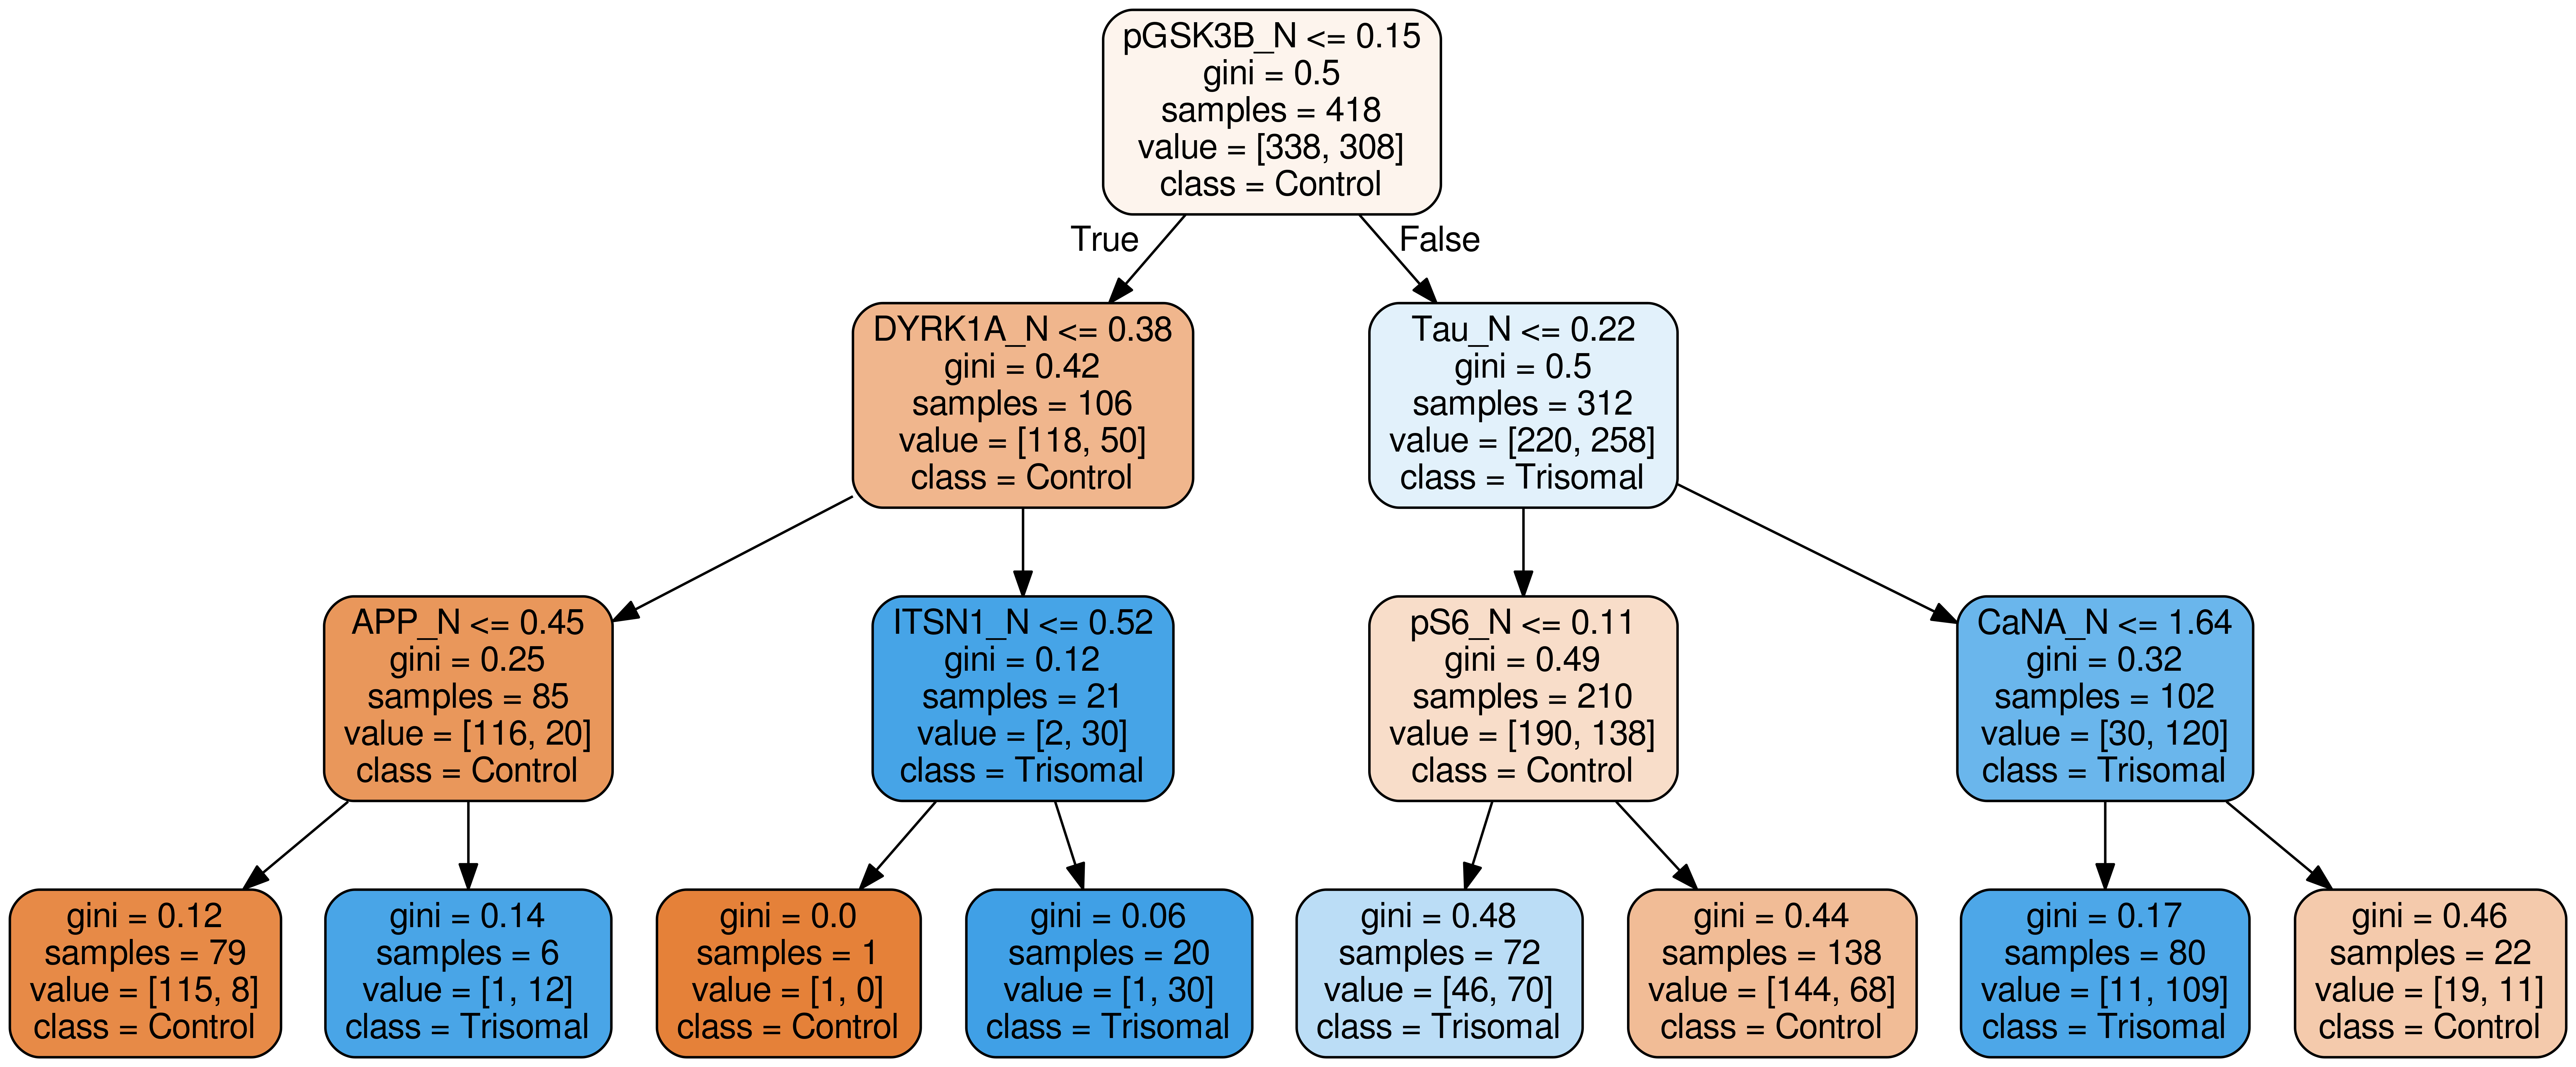

In [22]:
from sklearn.tree import export_graphviz
export_graphviz(clf_imptd.estimators_[5], out_file='tree.dot', 
                feature_names = imp,
                class_names = ['Control', 'Trisomal'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
from IPython.display import Image
Image(filename = 'tree.png')

In [23]:
protein_exd['Genotype'] = protein_exd['Genotype'].map({'Control': 0, 'Ts65Dn': 1})
yg = protein_exd['Genotype']
yg_train, yg_test = train_test_split(yg, test_size=0.4, random_state=1)
clf_impt = RandomForestClassifier(n_estimators=100, random_state=1, n_jobs=1)
clf_impt.fit(X_imp_train, yg_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                       oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [24]:
yg_imp_pred = clf_impt.predict(X_imp_test)
accuracy_score(yg_test, yg_imp_pred)

0.9721577726218097

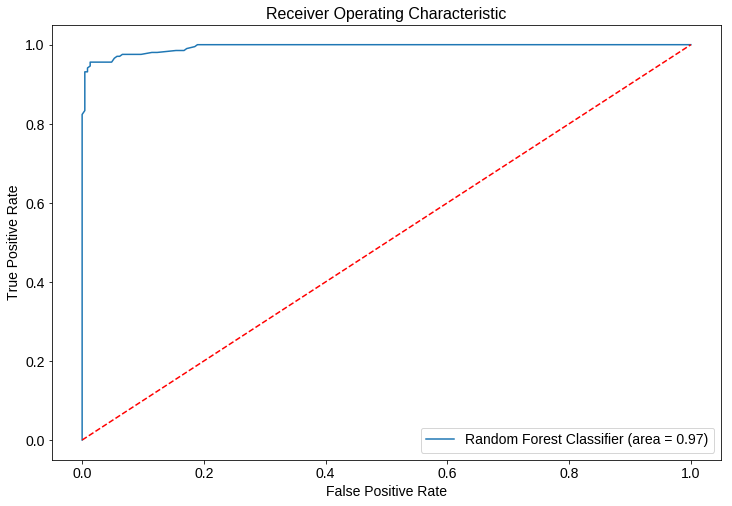

In [25]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(yg_test, clf_impt.predict(X_imp_test))
fpr, tpr, thresholds = roc_curve(yg_test, clf_impt.predict_proba(X_imp_test)[:,1:26])
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic', fontsize=16)
plt.legend(loc="lower right", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.style.use('seaborn')
plt.show()

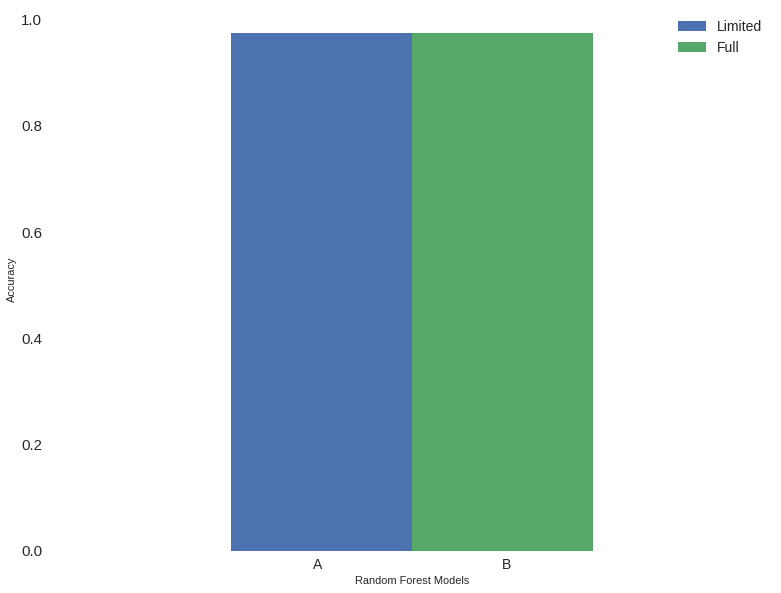

In [26]:
a = {'Limited': [0.974477958236659], 'Full': [0.974477958236659]}
accuracies = pd.DataFrame(data=a)
accuracies
ax = accuracies.plot.bar(
    figsize= (13, 10),
    fontsize=15)
ax.set(ylabel = 'Accuracy')
ax.set(xlabel = 'Random Forest Models')
ax.set_xticklabels('', fontsize=14)
plt.legend(fontsize=14)
x_labels = ['A', 'B']
xticks = [-0.13, 0.13]
ax.set_xticks(xticks)
ax.set_xticklabels(x_labels, rotation=0, fontsize=14)
ax.set_facecolor('xkcd:white')
ax.set_facecolor(('#ffffff'))
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')

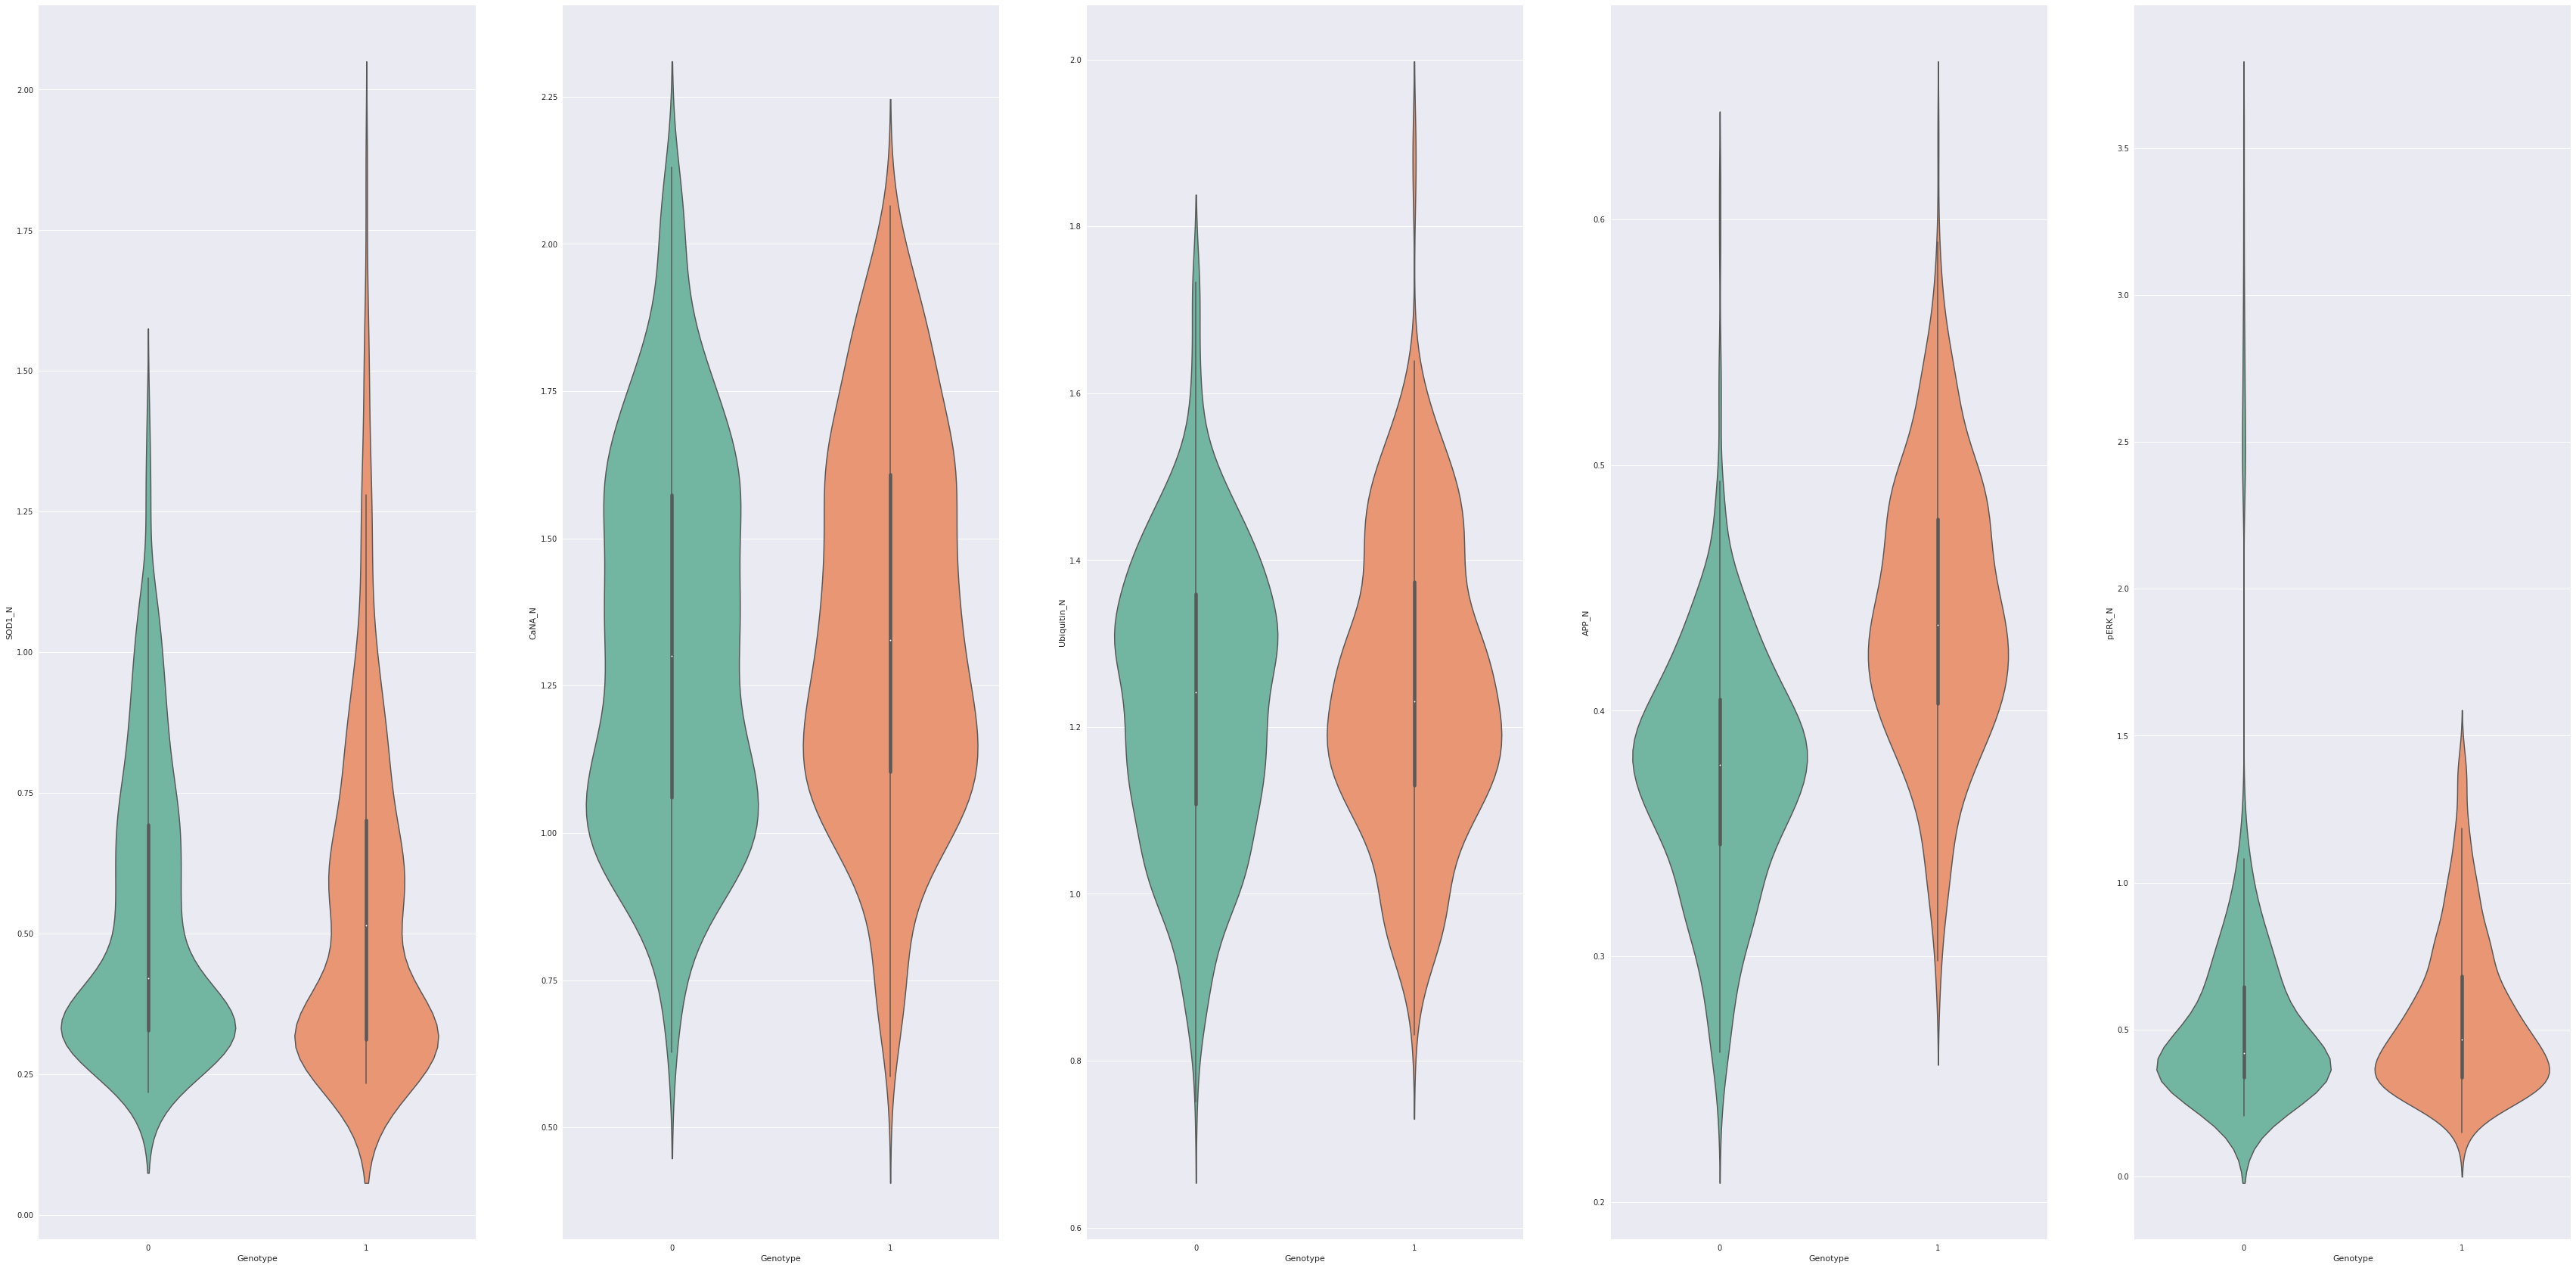

In [27]:
fig, axs = plt.subplots(1, 5, figsize=(60, 30))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
sns.violinplot(
    y='SOD1_N',
    x='Genotype',
    data=protein_exd,
    palette='Set2',
    ax=axs[0]
    )
sns.violinplot(
    y='CaNA_N',
    x='Genotype',
    data=protein_exd,
    palette='Set2',
    ax=axs[1]
    )
sns.violinplot(
    y='Ubiquitin_N',
    x='Genotype',
    data=protein_exd,
    palette='Set2',
    ax=axs[2]
    )
sns.violinplot(
    y='APP_N',
    x='Genotype',
    data=protein_exd,
    palette='Set2',
    ax=axs[3]
    )
sns.violinplot(
    y='pERK_N',
    x='Genotype',
    data=protein_exd,
    palette='Set2',
    ax=axs[4]
    )

In [28]:
lr = LogisticRegression()
lr.fit(X_imp_train, yg_train)
lr.predict(X_imp_test)
score = lr.score(X_imp_test, yg_test)
print(score)

0.8167053364269141


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


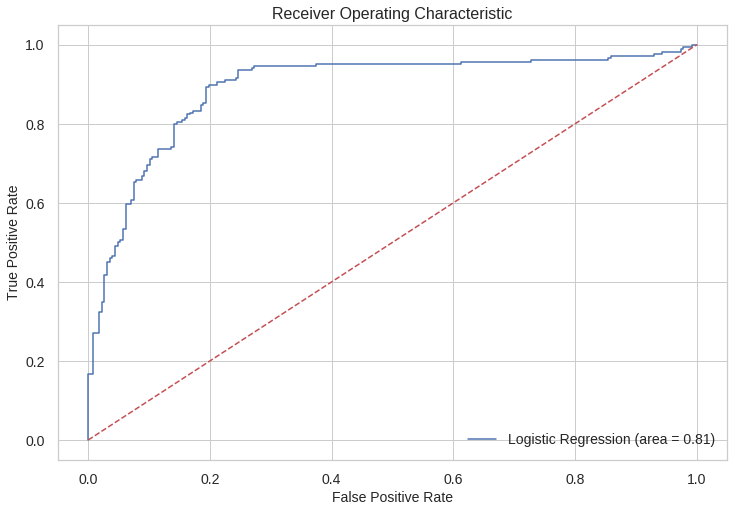

In [29]:
logit_roc_auc = roc_auc_score(yg_test, lr.predict(X_imp_test))
fpr, tpr, thresholds = roc_curve(yg_test, lr.predict_proba(X_imp_test)[:,1:26])
plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic', fontsize=16)
plt.legend(loc="lower right", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.style.use('seaborn')
plt.show()

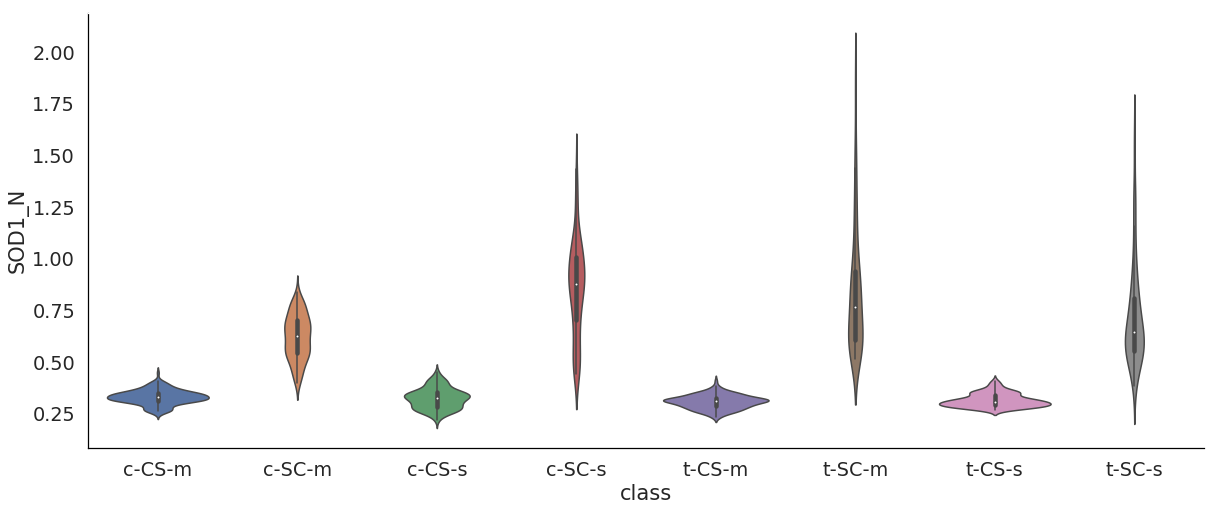

In [30]:
# Making a violing plot of the top 5 important proteins by each class
sns.set(rc={'figure.figsize':(20,8)})
sns.set_style('ticks')
sns.set(font_scale = 1.75)
g = sns.violinplot(
    y='SOD1_N',
    x='class',
    data=protein_exd
    )
g.set_facecolor('xkcd:white')
g.spines['left'].set_color('black')
g.spines['bottom'].set_color('black')

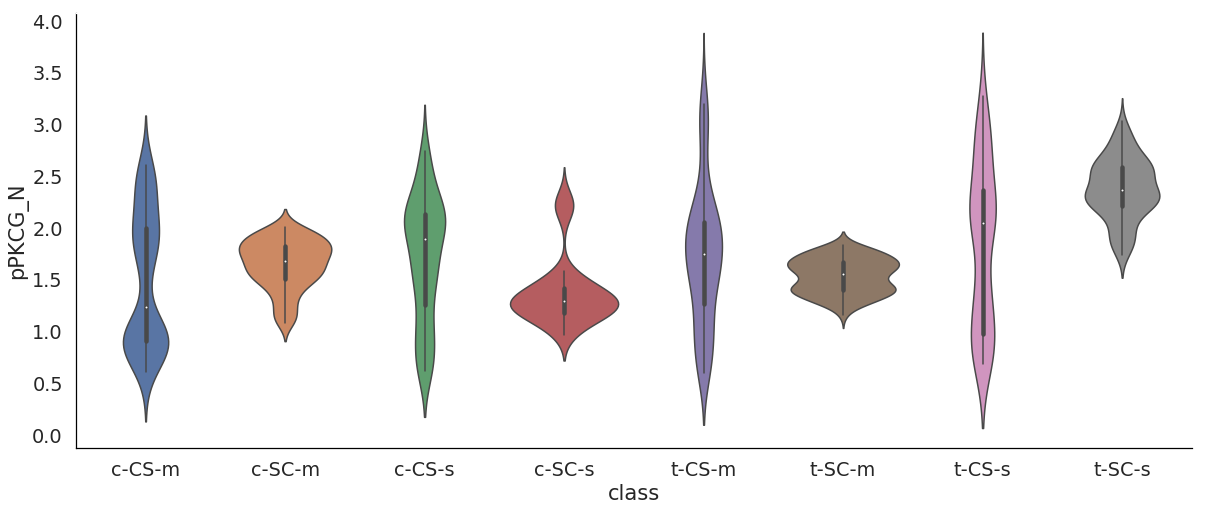

In [31]:
sns.set(rc={'figure.figsize':(20,8)})
sns.set_style('ticks')
sns.set(font_scale = 1.75)
g = sns.violinplot(
    y='pPKCG_N',
    x='class',
    data=protein_exd
    )
g.set_facecolor('xkcd:white')
g.spines['left'].set_color('black')
g.spines['bottom'].set_color('black')

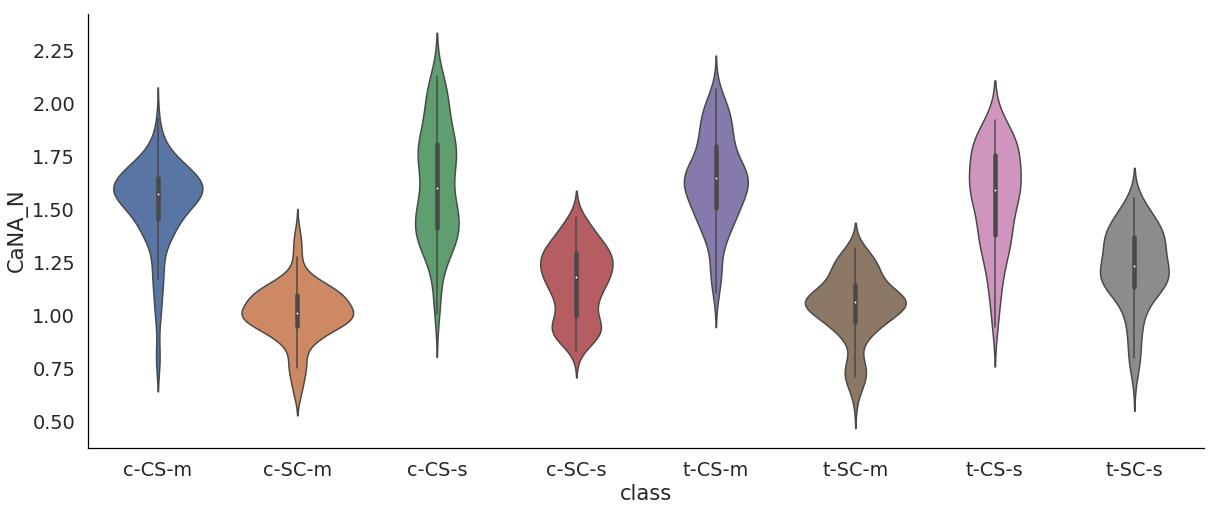

In [32]:
sns.set(rc={'figure.figsize':(20,8)})
sns.set_style('ticks')
sns.set(font_scale = 1.75)
g = sns.violinplot(
    y='CaNA_N',
    x='class',
    data=protein_exd
    )
g.set_facecolor('xkcd:white')
g.spines['left'].set_color('black')
g.spines['bottom'].set_color('black')

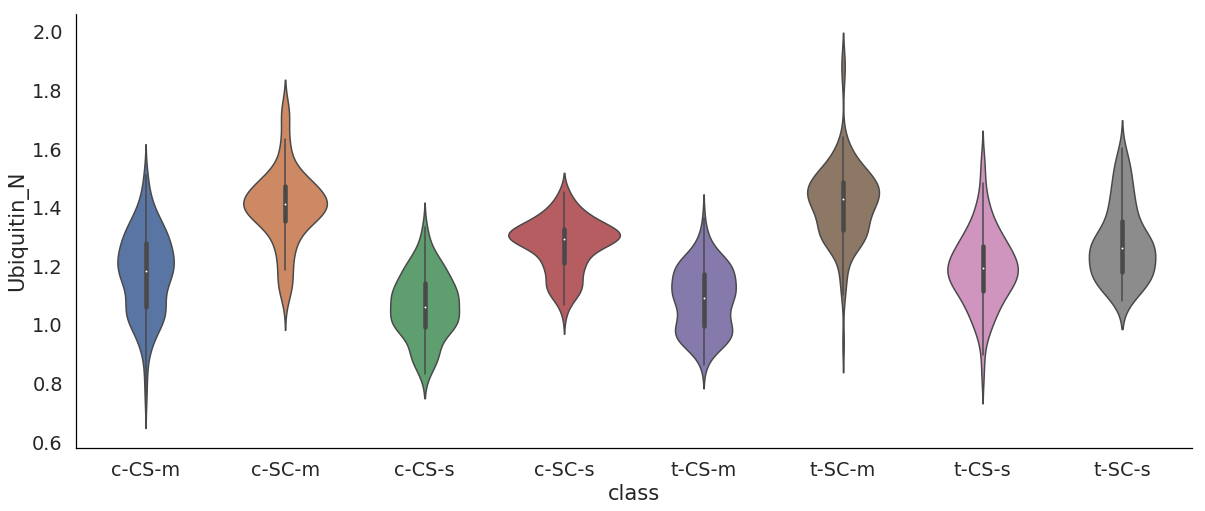

In [33]:
sns.set(rc={'figure.figsize':(20,8)})
sns.set_style('ticks')
sns.set(font_scale = 1.75)
g = sns.violinplot(
    y='Ubiquitin_N',
    x='class',
    data=protein_exd
    )
g.set_facecolor('xkcd:white')
g.spines['left'].set_color('black')
g.spines['bottom'].set_color('black')

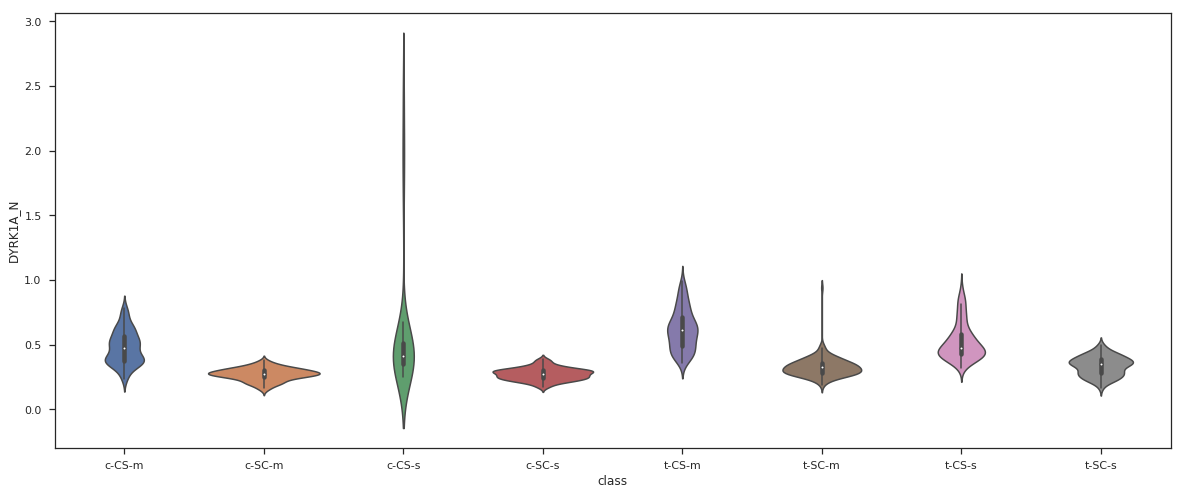

In [34]:
sns.set(rc={'figure.figsize':(20,8)})
sns.set_style('ticks')
g = sns.violinplot(
    y='DYRK1A_N',
    x='class',
    data=protein_exd
    )

In [35]:
lr = LogisticRegression()
lr.fit(X_imp_train, y_train)
lr.predict(X_imp_test)
score = lr.score(X_imp_test, y_test)
print(score)

0.740139211136891


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
kmodel = KNeighborsClassifier(n_jobs=-1)
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
grid = GridSearchCV(kmodel, param_grid=params, n_jobs=1, scoring='accuracy')
grid.fit(X_imp_train, y_train)
print("Best Hyper Parameters:\n",grid.best_params_)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best Hyper Parameters:
 {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 1, 'weights': 'uniform'}


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [37]:
pred = grid.predict(X_imp_test)
print('Accuracy:', accuracy_score(pred, y_test))

Accuracy: 0.974477958236659


In [38]:
kgmodel = KNeighborsClassifier(n_jobs=-1)
kgmodel.fit(X_imp_train, yg_train)
pred_gen = kgmodel.predict(X_imp_test)
print('Accuracy:', accuracy_score(pred_gen, yg_test))

Accuracy: 0.9164733178654292


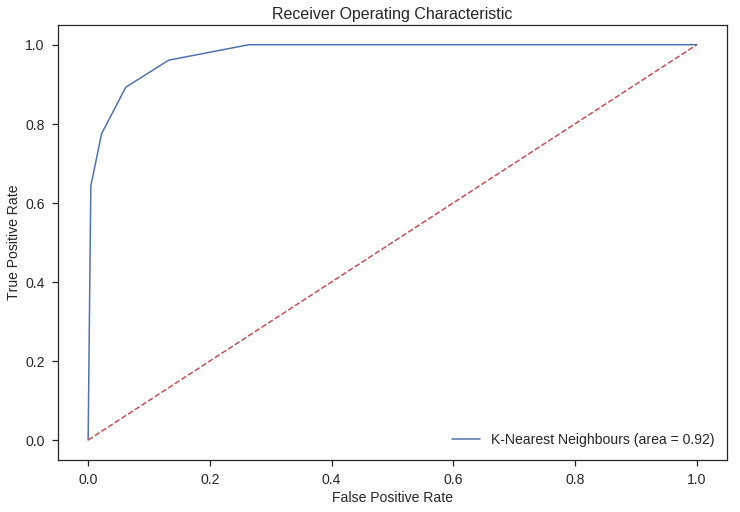

In [39]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(yg_test, kgmodel.predict(X_imp_test))
fpr, tpr, thresholds = roc_curve(yg_test, kgmodel.predict_proba(X_imp_test)[:,1:26])
plt.figure(figsize=(12, 8))
plt.plot(fpr, tpr, label='K-Nearest Neighbours (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic', fontsize=16)
plt.legend(loc="lower right", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.style.use('seaborn')
plt.show()

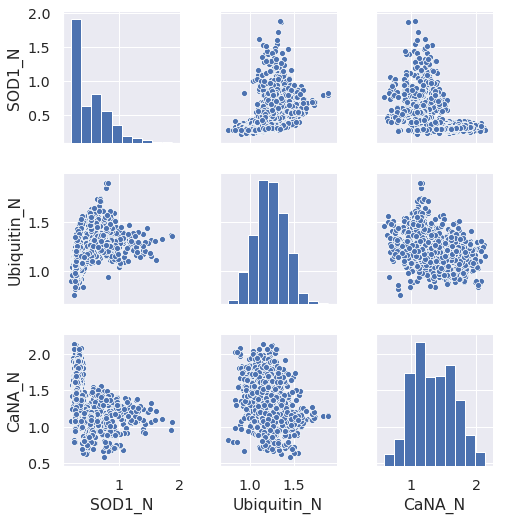

In [40]:
from pylab import rcParams
sns.set(font_scale=1.3)
rcParams['figure.figsize'] = (20, 20)
cols = ['SOD1_N', 'Ubiquitin_N', 'CaNA_N']
x = protein_exd[['SOD1_N', 'Ubiquitin_N', 'CaNA_N']]
sns_plot = sns.pairplot(x[cols])

In [41]:
sns.set(font_scale=3)
def plot_corr( df ):
    corr = df.corr()
    _, ax=plt.subplots( figsize=(50,25) )
    cmap = sns.diverging_palette( 240 , 10 , as_cmap = True)
    _ = sns.heatmap(corr,cmap=cmap,square=True, cbar_kws = {'shrink': .9}, ax=ax, annot=False)
    plot_corr(protein_exd)

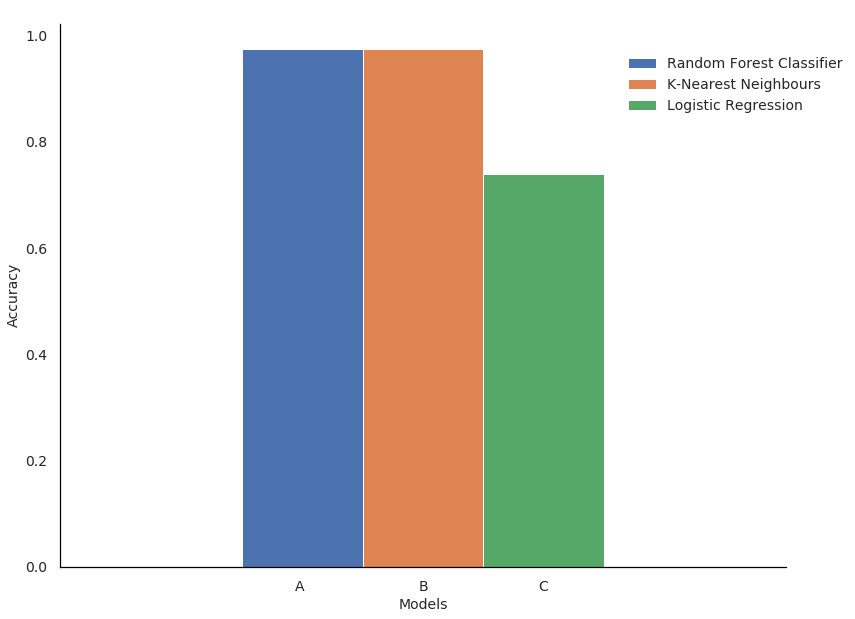

In [42]:
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
a = {'Random Forest Classifier': [0.974477958236659], 'K-Nearest Neighbours': [0.974477958236659], 'Logistic Regression': [0.740139211136891]}
accuracies = pd.DataFrame(data=a)
sns.set(font_scale=1)
ax = accuracies.plot.bar(
    figsize= (13, 10),
    fontsize=14)
plt.xticks(rotation=0, fontsize=14)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
x_labels = ['A', 'B', 'C']
xticks = [-0.17, 0,0.165]
ax.set_xticks(xticks)
ax.set_xticklabels(x_labels, rotation=0)
axbox = ax.get_position()
plt.legend(loc = (axbox.x0 + 0.65, axbox.y0 + 0.70), fontsize=14)
plt.title(' ')
ax.set_facecolor('xkcd:white')
ax.set_facecolor(('#ffffff'))
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')

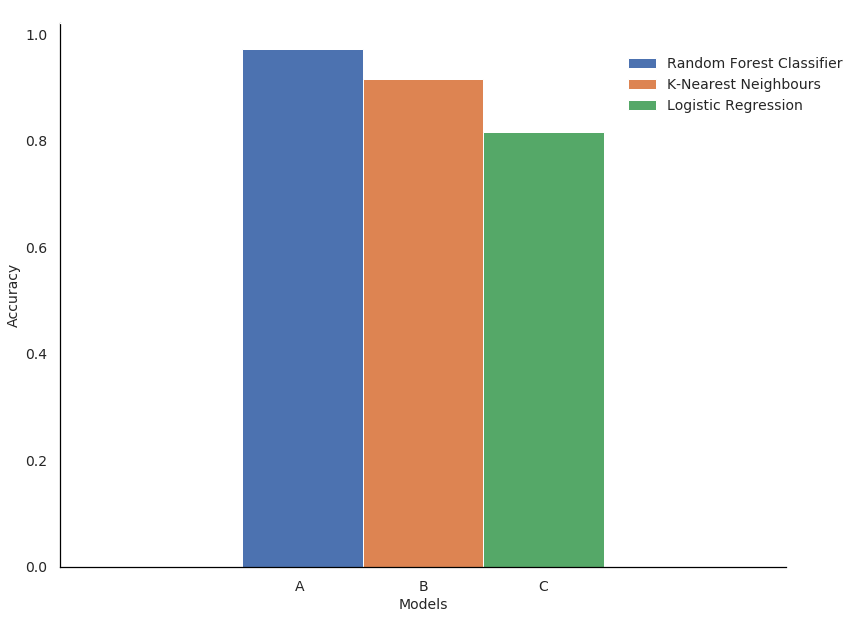

In [43]:
a = {'Random Forest Classifier': [0.9721577726218097], 'K-Nearest Neighbours': [0.9164733178654292], 'Logistic Regression': [0.8167053364269141]}
accuracies = pd.DataFrame(data=a)
ax = accuracies.plot.bar(
    figsize= (13, 10),
    fontsize=14)
plt.xticks(rotation=0, fontsize=14)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
x_labels = ['A', 'B', 'C']
xticks = [-0.17, 0,0.165]
ax.set_xticks(xticks)
ax.set_xticklabels(x_labels, rotation=0)
axbox = ax.get_position()
plt.legend(loc = (axbox.x0 + 0.65, axbox.y0 + 0.70), fontsize=14)
plt.title(" ")
ax.set_facecolor('xkcd:white')
ax.set_facecolor(('#ffffff'))
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')